In [1]:
import sympy as smp
from sympy import *
import numpy as np
from numpy import *
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from fractions import Fraction
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "notebook", "grid"])

x, y, t, n, a, b, C, c, r, u, s, A, i, j, k, z, w = smp.symbols(
    "x y t n a b C c r u s A i j k z w"
)
f, g, m = smp.symbols("f g m", cls=smp.Function)

# 10.1.11

In [2]:
# Define the derivative function
def f_prime(x):
    return 3 - 3 * x**2


# Fixed points
fixed_points = [0, np.sqrt(2), -np.sqrt(2)]

# Check stability
for x in fixed_points:
    derivative_at_x = f_prime(x)
    if abs(derivative_at_x) < 1:
        print(f"Fixed point at x = {x} is stable")
    else:
        print(f"Fixed point at x = {x} is unstable")

Fixed point at x = 0 is unstable
Fixed point at x = 1.4142135623730951 is unstable
Fixed point at x = -1.4142135623730951 is unstable


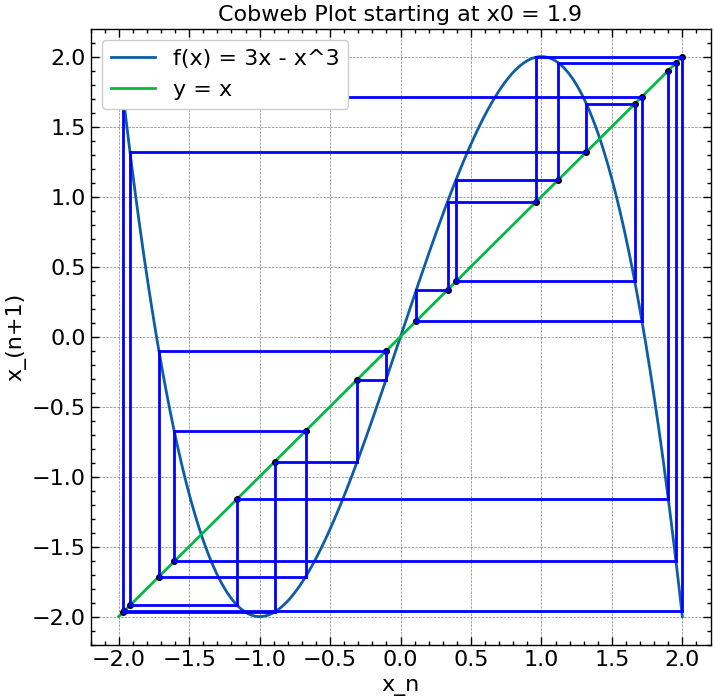

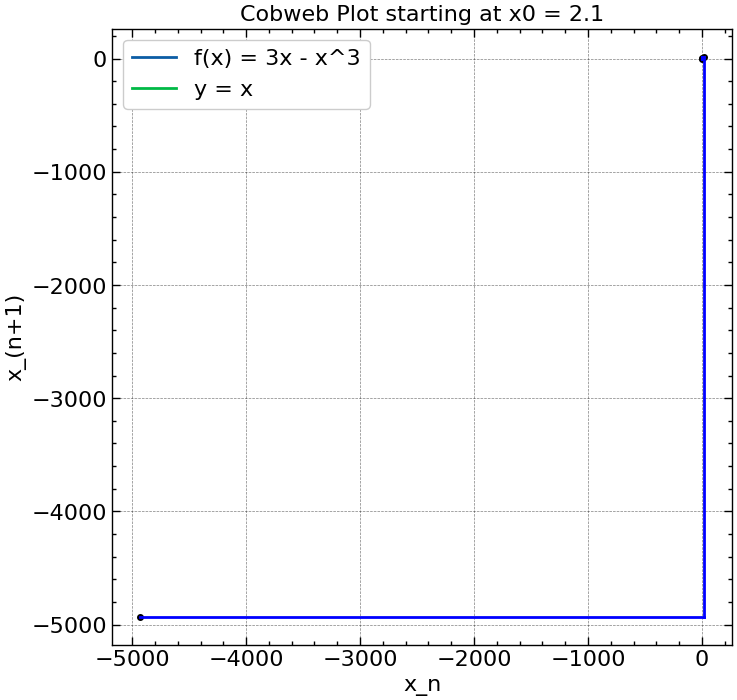

In [7]:
# Define the function
def f(x):
    return 3 * x - x**3


# Function to generate a cobweb plot with overflow handling
def cobweb_plot(x0, n, max_abs_x=1e10):
    x_values = [x0]
    for _ in range(n):
        next_x = f(x_values[-1])
        if abs(next_x) > max_abs_x:  # Check for overflow
            break
        x_values.append(next_x)

    plt.figure(figsize=(8, 8))
    x = np.linspace(-2, 2, 400)
    plt.plot(x, f(x), label="f(x) = 3x - x^3")
    plt.plot(x, x, label="y = x")
    plt.plot(x_values, x_values, "ko", markersize=4)

    for i in range(len(x_values) - 1):
        plt.plot([x_values[i], x_values[i]], [x_values[i], x_values[i + 1]], "b")
        plt.plot(
            [x_values[i], x_values[i + 1]], [x_values[i + 1], x_values[i + 1]], "b"
        )

    plt.xlabel("x_n")
    plt.ylabel("x_(n+1)")
    plt.title(f"Cobweb Plot starting at x0 = {x0}")
    plt.legend()
    plt.show()


# Generate cobweb plots
cobweb_plot(1.9, 20)
cobweb_plot(2.1, 20)

# 10.1.12

In [8]:
def newton_map(x):
    return x - (x**2 - 4) / (2 * x)

# Starting point
x0 = 1

# Number of iterations
num_iterations = 10

# Iterating the map
x = x0
for i in range(num_iterations):
    x = newton_map(x)
    print(f"Iteration {i+1}: x = {x}")

# The output will show the value of x at each iteration

Iteration 1: x = 2.5
Iteration 2: x = 2.05
Iteration 3: x = 2.000609756097561
Iteration 4: x = 2.0000000929222947
Iteration 5: x = 2.000000000000002
Iteration 6: x = 2.0
Iteration 7: x = 2.0
Iteration 8: x = 2.0
Iteration 9: x = 2.0
Iteration 10: x = 2.0


In [9]:
def f_prime(x):
    return (-4 + x**2) / (2 * x**2)


# Fixed points
fixed_points = [2, -2]

# Check if the derivative at each fixed point is zero
for x in fixed_points:
    derivative_at_x = f_prime(x)
    if derivative_at_x == 0:
        print(f"Fixed point at x = {x} is superstable")
    else:
        print(f"Fixed point at x = {x} is not superstable")

Fixed point at x = 2 is superstable
Fixed point at x = -2 is superstable
